# Aula 04 - Boosting - Exercício

## Exercício 1

A partir do dataset abaixo, utilize um modelo **LightGBM** para prever, a partir das variáveis de entrada, a probabilidade do individuo receber mais de $50k por ano. Defina um ponto de corte na probabilidade em que, sempre que a probabilidade for maior que o corte, a classe será predita como 1. Otimize os parâmetros do seu modelo utilizando o **GridSearchCV** do sklearn!  

Uma descrição do dataset pode ser encontrada [aqui](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).  

Ao final do exercício, reporte:  

1 - O tamanho da base utilizada para treino/validação e o tamanho da base utilizada para teste;  
2 - Um gráfico de barras com a importância de cada variável no precesso de predição;  
3 - A acurácia, precisão e recall de treino, validação e teste;  
4 - Uma comparação com o desempenho de um RandomForest padrão do sklearn.  

**Importante**: lembre-se de fazer a divisão do conjunto de teste antes de iniciar o exercício!

In [1]:
import pandas as pd

In [46]:
adult_dataset = pd.read_csv('adult.csv')

print(adult_dataset.shape)

adult_dataset.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [47]:
# Eliminando dados faltantes

adult_dataset = adult_dataset.dropna()

print(adult_dataset.shape)

adult_dataset.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [48]:
# Separando o Dataset em Dataframes de Treino e Teste

import numpy as np

adult_dataset['split'] = np.random.randn(adult_dataset.shape[0], 1)

msk = np.random.rand(len(adult_dataset)) <= 0.5

df_adult_train = adult_dataset[msk]
df_adult_test = adult_dataset[~msk]

df_adult_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,split
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,1.194776
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,-0.622974
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,-0.611684
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,-0.253806
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,1.325120


In [49]:
df_adult_train = df_adult_train.drop(['split'], axis=1)
df_adult_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [50]:
df_adult_test = df_adult_test.drop(['split'], axis=1)
df_adult_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [51]:
df_adult_train['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [52]:
df_adult_train['income'] = df_adult_train['income'].map({'<=50K': 0, '>50K': 1})

df_adult_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [53]:
categ_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
num_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [54]:
X = df_adult_train[categ_features + num_features]
y = df_adult_train['income']

print(X.shape, y.shape)

(24393, 12) (24393,)


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(17075, 12) (17075,)
(7318, 12) (7318,)


In [56]:
from sklearn.preprocessing import OrdinalEncoder
pd.options.mode.chained_assignment = None

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

oe.fit(X_train[categ_features])

X_train[categ_features] = oe.transform(X_train[categ_features])

X_valid[categ_features] = oe.transform(X_valid[categ_features])

X_train.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
17086,4.0,2.0,3.0,0.0,4.0,1.0,38.0,32,9,5178,0,48
7200,4.0,0.0,3.0,3.0,4.0,1.0,38.0,30,9,0,0,40
44451,7.0,0.0,4.0,4.0,4.0,0.0,38.0,43,9,0,0,40
34692,4.0,4.0,3.0,1.0,4.0,1.0,38.0,29,13,0,0,40
12861,2.0,2.0,8.0,2.0,4.0,1.0,38.0,26,7,0,0,50


In [57]:
from lightgbm import LGBMClassifier

In [58]:
modelo = LGBMClassifier(n_estimators=50, max_depth=7, learning_rate=0.1, is_unbalance=True, importance_type='gain')

modelo

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50)

In [59]:
# Treino do modelo

modelo.fit(X_train, y_train)

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50)

In [60]:
y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(17075,) (7318,)


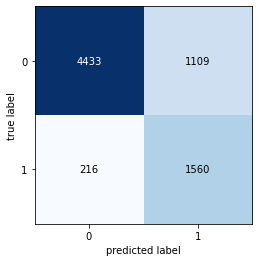

In [61]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.83, Precision: 0.60, Recall: 0.90
Validação:
Acc: 0.82, Precision: 0.58, Recall: 0.88


In [63]:
modelo.feature_importances_

array([  697.26179755, 31369.77957522,  3567.54469203, 11733.68364885,
         587.06297112,   576.46122313,   411.30254185,  9068.85454249,
       15633.33137872, 16839.79381166,  4637.59800146,  4498.0373857 ])

In [64]:
from sklearn.model_selection import GridSearchCV

In [35]:
modelo = LGBMClassifier()

parameters = {
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [20, 50, 70, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'is_unbalance': [True, False]
}

clf = GridSearchCV(modelo, parameters, verbose=3, scoring='recall')

clf.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.000 total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.000 total time=   0.1s
[CV 3/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.000 total time=   0.0s
[CV 4/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.000 total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.000 total time=   0.0s
[CV 1/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.063 total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.097 total time=   0.1s
[CV 3/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.107 total time=   0.1s
[CV 4/5] END is_unbalance

[CV 4/5] END is_unbalance=True, learning_rate=0.01, max_depth=6, n_estimators=70;, score=0.540 total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=0.01, max_depth=6, n_estimators=70;, score=0.547 total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=0.01, max_depth=6, n_estimators=150;, score=0.780 total time=   0.3s
[CV 2/5] END is_unbalance=True, learning_rate=0.01, max_depth=6, n_estimators=150;, score=0.804 total time=   0.2s
[CV 3/5] END is_unbalance=True, learning_rate=0.01, max_depth=6, n_estimators=150;, score=0.794 total time=   0.3s
[CV 4/5] END is_unbalance=True, learning_rate=0.01, max_depth=6, n_estimators=150;, score=0.801 total time=   0.4s
[CV 5/5] END is_unbalance=True, learning_rate=0.01, max_depth=6, n_estimators=150;, score=0.816 total time=   0.2s
[CV 1/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=20;, score=0.000 total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=20;, 

[CV 2/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.866 total time=   0.1s
[CV 3/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.852 total time=   0.1s
[CV 4/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.852 total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.873 total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=70;, score=0.877 total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=70;, score=0.870 total time=   0.1s
[CV 3/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=70;, score=0.849 total time=   0.1s
[CV 4/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=70;, score=0.860 total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=70;, score=0.872 to

[CV 2/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20;, score=0.864 total time=   0.0s
[CV 3/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20;, score=0.834 total time=   0.1s
[CV 4/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20;, score=0.840 total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20;, score=0.860 total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.849 total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.861 total time=   0.1s
[CV 3/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.827 total time=   0.1s
[CV 4/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.824 total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.862 to

[CV 5/5] END is_unbalance=True, learning_rate=0.5, max_depth=7, n_estimators=70;, score=0.788 total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.792 total time=   0.2s
[CV 2/5] END is_unbalance=True, learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.792 total time=   0.3s
[CV 3/5] END is_unbalance=True, learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.758 total time=   0.3s
[CV 4/5] END is_unbalance=True, learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.763 total time=   0.2s
[CV 5/5] END is_unbalance=True, learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.760 total time=   0.3s
[CV 1/5] END is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=20;, score=0.860 total time=   0.0s
[CV 2/5] END is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=20;, score=0.850 total time=   0.0s
[CV 3/5] END is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=20;, score=0.834 tot

[CV 5/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=50;, score=0.778 total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=70;, score=0.811 total time=   0.2s
[CV 2/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=70;, score=0.781 total time=   0.2s
[CV 3/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=70;, score=0.763 total time=   0.2s
[CV 4/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=70;, score=0.764 total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=70;, score=0.778 total time=   0.2s
[CV 1/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=150;, score=0.729 total time=   0.3s
[CV 2/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=150;, score=0.740 total time=   0.2s
[CV 3/5] END is_unbalance=True, learning_rate=1, max_depth=6, n_estimators=150;, score=0.729 total time=   0.2

[CV 4/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=20;, score=0.000 total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=20;, score=0.000 total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.203 total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.203 total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.165 total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.190 total time=   0.2s
[CV 5/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.189 total time=   0.2s
[CV 1/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=70;, score=0.228 total time=   0.2s
[CV 2/5] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=7

[CV 2/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.593 total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.611 total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.608 total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.608 total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.1, max_depth=4, n_estimators=20;, score=0.511 total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=0.1, max_depth=4, n_estimators=20;, score=0.499 total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=0.1, max_depth=4, n_estimators=20;, score=0.489 total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=0.1, max_depth=4, n_estimators=20;, score=0.511 total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=0.1, max_depth=4, n_estimators=20;, s

[CV 4/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=50;, score=0.608 total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=50;, score=0.598 total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=70;, score=0.623 total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=70;, score=0.616 total time=   0.2s
[CV 3/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=70;, score=0.620 total time=   0.5s
[CV 4/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=70;, score=0.615 total time=   0.2s
[CV 5/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=70;, score=0.615 total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=150;, score=0.643 total time=   0.4s
[CV 2/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=150;, sco

[CV 2/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20;, score=0.617 total time=   0.2s
[CV 3/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20;, score=0.634 total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20;, score=0.622 total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20;, score=0.631 total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50;, score=0.655 total time=   0.2s
[CV 2/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50;, score=0.623 total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50;, score=0.651 total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50;, score=0.638 total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50;, score

[CV 5/5] END is_unbalance=False, learning_rate=1, max_depth=4, n_estimators=70;, score=0.642 total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=1, max_depth=4, n_estimators=150;, score=0.630 total time=   0.3s
[CV 2/5] END is_unbalance=False, learning_rate=1, max_depth=4, n_estimators=150;, score=0.662 total time=   0.2s
[CV 3/5] END is_unbalance=False, learning_rate=1, max_depth=4, n_estimators=150;, score=0.643 total time=   0.2s
[CV 4/5] END is_unbalance=False, learning_rate=1, max_depth=4, n_estimators=150;, score=0.637 total time=   0.2s
[CV 5/5] END is_unbalance=False, learning_rate=1, max_depth=4, n_estimators=150;, score=0.631 total time=   0.2s
[CV 1/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=20;, score=0.650 total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=20;, score=0.633 total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=20;, score=0.650 total 

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'is_unbalance': [True, False],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [20, 50, 70, 150]},
             scoring='recall', verbose=3)

In [65]:
modelo.predict_proba(X_valid)[:,1]

array([0.89996618, 0.01989951, 0.04510369, ..., 0.05359711, 0.10752114,
       0.05026938])

In [66]:
clf.best_params_

{'is_unbalance': True,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 50}